In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
house_data = pd.read_csv('house_data.csv')
house_data.head()

,price,surface,arrondissement
0,1820,46.1,1.0
1,1750,41.0,1.0
2,1900,55.0,1.0
3,1950,46.0,1.0
4,1950,49.0,1.0


In [33]:
house_data.shape

(827, 3)

In [36]:
house_data.isna().sum()

price             0
surface           5
arrondissement    5
dtype: int64

In [38]:
house_data.dropna(inplace=True)
house_data.isna().sum()

price             0
surface           0
arrondissement    0
dtype: int64

In [53]:
house_data = house_data.loc[house_data['price']<10000, :]

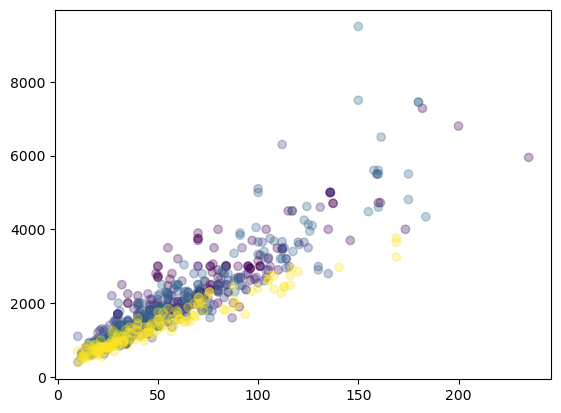

In [54]:
plt.scatter(house_data['surface'], house_data['price'], c=house_data['arrondissement'], alpha=0.3)
plt.show()

In [55]:
X1 = np.array(house_data['surface']).reshape(-1,1)
X1[:10]

array([[46.1],
       [41. ],
       [55. ],
       [46. ],
       [49. ],
       [67. ],
       [35. ],
       [90.6],
       [60. ],
       [47. ]])

In [56]:
X = np.vstack([house_data['surface'], house_data['arrondissement']]).T
X[:10]

array([[46.1,  1. ],
       [41. ,  1. ],
       [55. ,  1. ],
       [46. ,  1. ],
       [49. ,  1. ],
       [67. ,  1. ],
       [35. ,  1. ],
       [90.6,  1. ],
       [60. ,  1. ],
       [47. ,  1. ]])

In [57]:
y = np.array(house_data['price']).reshape(-1,1)
y[:10]

array([[1820],
       [1750],
       [1900],
       [1950],
       [1950],
       [1960],
       [2000],
       [1900],
       [2050],
       [2100]], dtype=int64)

In [58]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, train_size=0.8)

In [59]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(Xtrain, ytrain)

LinearRegression()

In [60]:
model.score(Xtest, ytest)

0.8416282582548873

In [61]:
X1train, X1test, ytrain, ytest = train_test_split(X,y, train_size=0.8)

In [62]:
model.fit(X1train, ytrain)
model.score(X1test, ytest)

0.818361686792928

In [65]:
arrondissements = house_data['arrondissement'].unique()
arrondissements

array([ 1.,  2.,  3.,  4., 10.])

In [69]:
models = []
for arrondissement in arrondissements:
    data = house_data.loc[house_data['arrondissement'] == arrondissement, :]
    X = np.array(data['surface']).reshape(-1, 1)
    y = np.array(data['price']).reshape(-1, 1)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, train_size=0.8)
    model = LinearRegression()
    model.fit(Xtrain, ytrain)
    score =  model.score(Xtest, ytest)
    models.append({'arrondisssement': arrondissement, 'model': model, 'score': score})
    print(f"arrondissement: {arrondissement} => score {score}")

print(models)

arrondissement: 1.0 => score 0.8373959327467625
arrondissement: 2.0 => score 0.8273188215881311
arrondissement: 3.0 => score 0.9041085844516035
arrondissement: 4.0 => score 0.8683080283995671
arrondissement: 10.0 => score 0.9244774482469463
[{'arrondisssement': 1.0, 'model': LinearRegression(), 'score': 0.8373959327467625}, {'arrondisssement': 2.0, 'model': LinearRegression(), 'score': 0.8273188215881311}, {'arrondisssement': 3.0, 'model': LinearRegression(), 'score': 0.9041085844516035}, {'arrondisssement': 4.0, 'model': LinearRegression(), 'score': 0.8683080283995671}, {'arrondisssement': 10.0, 'model': LinearRegression(), 'score': 0.9244774482469463}]
